In [66]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

It should include some film features and some rental features. Use the data from 2005.

In [67]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query1 = ''' SELECT r.rental_date, film_id, f.title, count(film_id), f.special_features, f.rating, f.length, f.rental_rate FROM rental r
JOIN inventory i USING (inventory_id)
JOIN film f USING (film_id)
WHERE rental_date LIKE '%%2005%%'
GROUP BY film_id
ORDER BY rental_date; '''


data1 = pd.read_sql_query(query1, engine)
data1

,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99
...,...,...,...,...,...,...,...,...
953,2005-07-27 07:02:30,485,JERSEY SASSY,6,"Deleted Scenes,Behind the Scenes",PG,60,4.99
954,2005-07-27 23:32:23,939,VERTIGO NORTHWEST,8,"Commentaries,Behind the Scenes",R,90,2.99
955,2005-07-28 17:02:32,904,TRAIN BUNCH,4,"Trailers,Deleted Scenes",R,71,4.99
956,2005-07-29 07:07:48,400,HARDLY ROBBERS,4,"Trailers,Behind the Scenes",R,72,2.99


Create a query to get the list of films and a boolean indicating if it was rented last month (mai 2005). This would be our target variable

In [68]:
query2 = ''' select distinct f.title,
CASE
WHEN (sum(case when date_format((r.rental_date), "%%M") = "May" 
and date_format((r.rental_date), "%%Y") = 2005
then True else False
END )) >= 1 then 1 else 0 end as rented_last_month
from film f
join inventory i on i.film_id = f.film_id
join rental r using(inventory_id)
group by f.title;'''

data2 =pd.read_sql_query(query2, engine)
data2

,title,rented_last_month
0,BLANKET BEVERLY,1
1,FREAKY POCUS,1
2,GRADUATE LORD,1
3,LOVE SUICIDES,1
4,IDOLS SNATCHERS,1
...,...,...
953,JERSEY SASSY,0
954,VERTIGO NORTHWEST,0
955,TRAIN BUNCH,0
956,HARDLY ROBBERS,0


In [69]:
data1.isna().sum()
data2.isna().sum()
data1.dtypes

rental_date         datetime64[ns]
film_id                      int64
title                       object
count(film_id)               int64
special_features            object
rating                      object
length                       int64
rental_rate                float64
dtype: object

In [70]:
display(data2)
display(data1)

,title,rented_last_month
0,BLANKET BEVERLY,1
1,FREAKY POCUS,1
2,GRADUATE LORD,1
3,LOVE SUICIDES,1
4,IDOLS SNATCHERS,1
...,...,...
953,JERSEY SASSY,0
954,VERTIGO NORTHWEST,0
955,TRAIN BUNCH,0
956,HARDLY ROBBERS,0


,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99
...,...,...,...,...,...,...,...,...
953,2005-07-27 07:02:30,485,JERSEY SASSY,6,"Deleted Scenes,Behind the Scenes",PG,60,4.99
954,2005-07-27 23:32:23,939,VERTIGO NORTHWEST,8,"Commentaries,Behind the Scenes",R,90,2.99
955,2005-07-28 17:02:32,904,TRAIN BUNCH,4,"Trailers,Deleted Scenes",R,71,4.99
956,2005-07-29 07:07:48,400,HARDLY ROBBERS,4,"Trailers,Behind the Scenes",R,72,2.99


merging the 2 datas extract from the queries

In [71]:
data = pd.merge(left = data1,
                right = data2,
                     how = 'inner', 
                        left_on = "title", 
                        right_on= "title")

display(data.dtypes)
data

rental_date          datetime64[ns]
film_id                       int64
title                        object
count(film_id)                int64
special_features             object
rating                       object
length                        int64
rental_rate                 float64
rented_last_month             int64
dtype: object

,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate,rented_last_month
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99,1
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99,1
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99,1
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99,1
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99,1
...,...,...,...,...,...,...,...,...,...
953,2005-07-27 07:02:30,485,JERSEY SASSY,6,"Deleted Scenes,Behind the Scenes",PG,60,4.99,0
954,2005-07-27 23:32:23,939,VERTIGO NORTHWEST,8,"Commentaries,Behind the Scenes",R,90,2.99,0
955,2005-07-28 17:02:32,904,TRAIN BUNCH,4,"Trailers,Deleted Scenes",R,71,4.99,0
956,2005-07-29 07:07:48,400,HARDLY ROBBERS,4,"Trailers,Behind the Scenes",R,72,2.99,0


X/y split & 
the heat map to distinguish the multi correlations

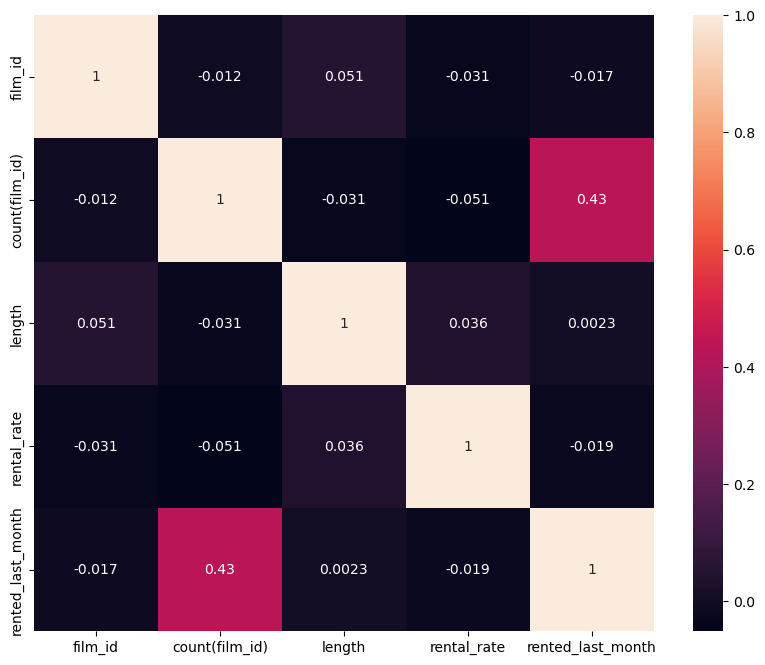

In [72]:


y = data[['rented_last_month']]

X = data.drop(['rented_last_month', 'title', 'rental_date', 'count(film_id)'], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [73]:
display(data)
X

,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate,rented_last_month
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99,1
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99,1
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99,1
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99,1
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99,1
...,...,...,...,...,...,...,...,...,...
953,2005-07-27 07:02:30,485,JERSEY SASSY,6,"Deleted Scenes,Behind the Scenes",PG,60,4.99,0
954,2005-07-27 23:32:23,939,VERTIGO NORTHWEST,8,"Commentaries,Behind the Scenes",R,90,2.99,0
955,2005-07-28 17:02:32,904,TRAIN BUNCH,4,"Trailers,Deleted Scenes",R,71,4.99,0
956,2005-07-29 07:07:48,400,HARDLY ROBBERS,4,"Trailers,Behind the Scenes",R,72,2.99,0


,film_id,special_features,rating,length,rental_rate
0,80,Trailers,G,148,2.99
1,333,"Trailers,Behind the Scenes",R,126,2.99
2,373,"Trailers,Behind the Scenes",G,156,2.99
3,535,"Trailers,Behind the Scenes",R,181,0.99
4,450,Trailers,NC-17,84,2.99
...,...,...,...,...,...
953,485,"Deleted Scenes,Behind the Scenes",PG,60,4.99
954,939,"Commentaries,Behind the Scenes",R,90,2.99
955,904,"Trailers,Deleted Scenes",R,71,4.99
956,400,"Trailers,Behind the Scenes",R,72,2.99


In [74]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
print('X_train is :', X_train.shape)
print('y_train is :', y_train.shape)
print('X_test is :', X_test.shape)
print('y_test is :', y_test.shape)

X_train is : (766, 5)
y_train is : (766, 1)
X_test is : (192, 5)
y_test is : (192, 1)


In [75]:
X_train_num = X_train.select_dtypes(include = np.number)
X_num = X.select_dtypes(include = np.number)
# Scaling data
scaler = MinMaxScaler().fit(X_train_num) # need to keep scaler
X_train_num_scaled = scaler.transform(X_train_num)
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns)

X_test_num = X_test.select_dtypes(include = np.number)

X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=  X_test_num.columns)



the distribution of the numericals and their shapes 

<Figure size 1400x2500 with 0 Axes>

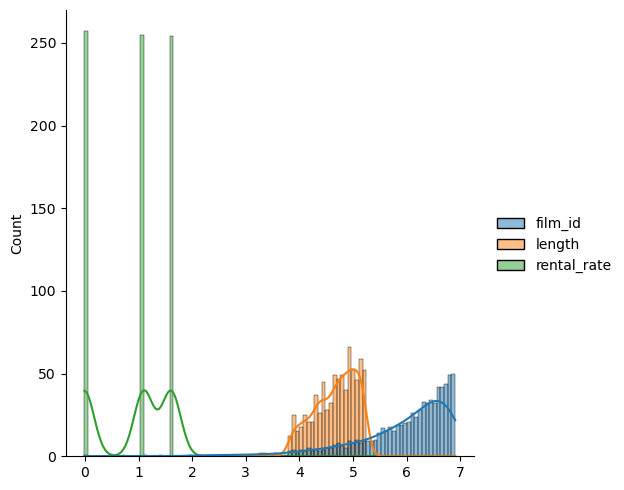

In [76]:
plt.figure(figsize = (14,25))
sns.displot(X_train_num.apply(np.log), bins=100, kde=True)

plt.show()

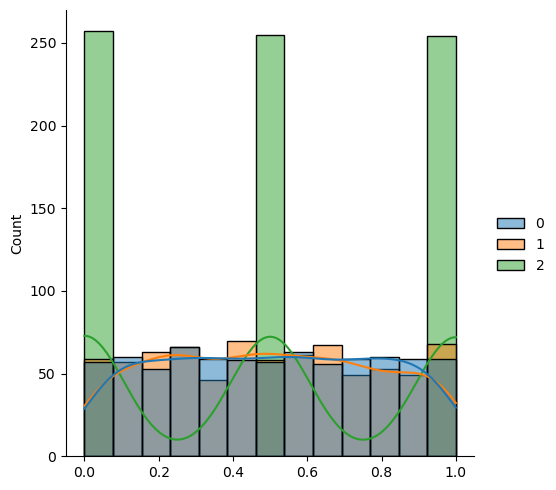

In [77]:
sns.displot(X_train_num_scaled, kde=True)
plt.show()

let's have a view of our pair plot 

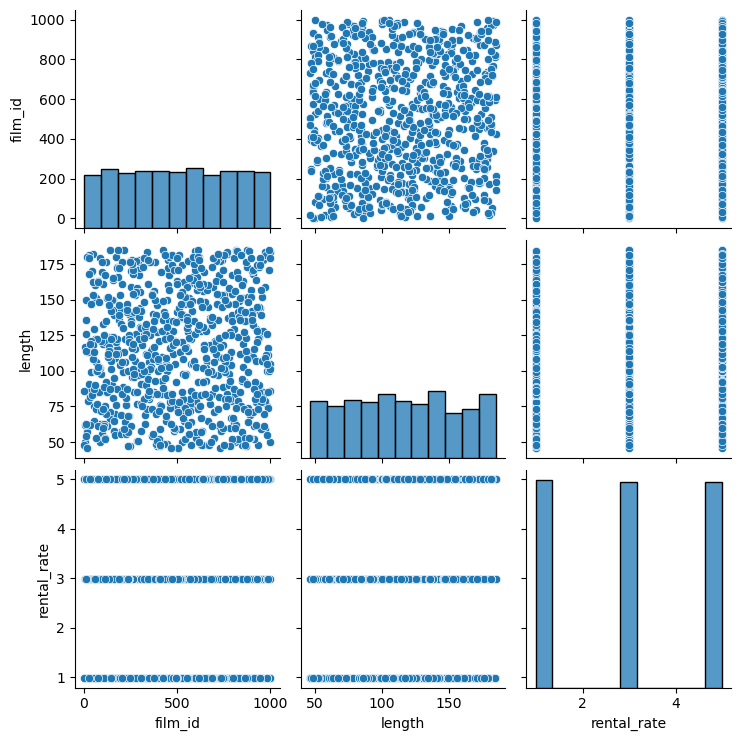

In [78]:
sns.pairplot(X_train_num)

Encoding categoricals

In [79]:
from sklearn.preprocessing import OneHotEncoder


X_train_cat = X_train.select_dtypes(object)
encoder = OneHotEncoder(drop='first', handle_unknown='error').fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()



X_test_cat = X_test.select_dtypes(object)

X_test_cat_encoded = encoder.transform(X_test_cat).toarray()



X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns= encoder.get_feature_names_out())
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns= encoder.get_feature_names_out())


display(X_train_cat_encoded_df.shape)
print('*' * 150)
display(X_test_cat_encoded_df.shape)



(766, 18)

******************************************************************************************************************************************************


(192, 18)

In [80]:
X_train_array = np.concatenate((X_train_num_scaled, X_train_cat_encoded), axis = 1)
X_test_array = np.concatenate((X_test_num_scaled, X_test_cat_encoded), axis = 1)

# We test our accuracy with a logistic regression model

In [81]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_array, y_train) 

c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
predictions = classification.predict(X_test_array)
classification.score(X_test_array, y_test)

0.703125

In [83]:
y_test.value_counts()

rented_last_month
1                    135
0                     57
dtype: int64